In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
stores  =  pd.read_csv("/content/drive/MyDrive/ProjectTS/stores.csv")
trans   =  pd.read_csv("/content/drive/MyDrive/ProjectTS/transactions.csv") 
oil     =  pd.read_csv("/content/drive/MyDrive/ProjectTS/oil.csv")
train   =  pd.read_csv("/content/drive/MyDrive/ProjectTS/train.csv")
holiday =  pd.read_csv("/content/drive/MyDrive/ProjectTS/holidays_events.csv")

df1 = train.merge(stores,how = 'left', on='store_nbr')
df2 = df1.merge(trans, how = 'left', on = ['date','store_nbr'])
df3 = df2.merge(oil, how = 'left', on='date')
dftr = df3.merge(holiday, how='left', on='date')

dftr.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [4]:
#conactenating all data frames

stores  =  pd.read_csv("/content/drive/MyDrive/ProjectTS/stores.csv")
trans   =  pd.read_csv("/content/drive/MyDrive/ProjectTS/transactions.csv") 
oil     =  pd.read_csv("/content/drive/MyDrive/ProjectTS/oil.csv")
test   =  pd.read_csv("/content/drive/MyDrive/ProjectTS/test.csv")
holiday =  pd.read_csv("/content/drive/MyDrive/ProjectTS/holidays_events.csv")
df11 = test.merge(stores,how = 'left', on='store_nbr')
df22 = df11.merge(trans, how = 'left', on = ['date','store_nbr'])
df33 = df22.merge(oil, how = 'left', on='date')
dfte = df33.merge(holiday, how='left', on='date')

dfte.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,Quito,Pichincha,D,13,NaN,46.8,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,1.0,Quito,Pichincha,D,13,NaN,46.8,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,8.0,Quito,Pichincha,D,13,NaN,46.8,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,560.0,Quito,Pichincha,D,13,NaN,46.8,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,1.0,Quito,Pichincha,D,13,NaN,46.8,NaN,NaN,NaN,NaN,NaN


In [5]:
dftr = dftr.drop(['type_y','locale','locale_name','description','transferred'], axis=1)
dfte = dfte.drop(['type_y','locale','locale_name','description','transferred'], axis=1)

dftr['date'] = pd.to_datetime(dftr['date'])
dfte['date'] = pd.to_datetime(dfte['date'])

dftr = dftr.set_index('date')
dfte = dfte.set_index('date')


In [6]:
dftr1 = dftr.drop(['dcoilwtico','family','type_x','city','state'], axis=1)
dfte1 = dfte.drop(['dcoilwtico','family','type_x','city','state'], axis=1)

In [7]:
dftr1 = dftr1.rolling(window=1782, min_periods=1).mean()
dfte1 = dfte1.rolling(window=1782, min_periods=1).mean()

In [8]:
dftr1 = dftr1.fillna(0)
dfte1 = dfte1.fillna(0)

In [9]:
dftr1 = pd.concat([dftr1,dftr[['dcoilwtico','family','type_x','city','state']]],axis=1)
dfte1 = pd.concat([dfte1,dfte[['dcoilwtico','family','type_x','city','state']]],axis=1)

In [10]:
dftr1 = dftr1.fillna(method='ffill')
dfte1 = dftr1.fillna(method='bfill')
dftr1 = dfte1.fillna(method='ffill')
dfte1 = dfte1.fillna(method='bfill')

In [11]:
dftr1.columns

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'cluster', 'transactions',
       'dcoilwtico', 'family', 'type_x', 'city', 'state'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()

c = ['city','state','family']
for i in c:
    dftr1[i] =  le.fit_transform(dftr1[i])
for j in c:
    dfte1[j] =  le.fit_transform(dfte1[j])

In [14]:
dftr1 = pd.get_dummies(dftr1)
dfte1 = pd.get_dummies(dfte1)

In [15]:
dftr1 = dftr1.drop(['id','store_nbr'],axis=1)
dfte1 = dfte1.drop(['id','store_nbr'],axis=1)

In [16]:
train = dftr1.sample(frac=0.005,random_state=0,replace=True)
test = dfte1.sample(frac=0.005,random_state=0,replace=True)

#train = dftr1[(dftr1['family']==27)]

#test = dfte1[(dfte1['family']==27)]
#test1 = sc.fit_transform(test)

#train = pd.DataFrame(train, columns=train.columns)
#test = pd.DataFrame(test, columns=test.columns)

In [17]:
X_f = train.drop(['sales','dcoilwtico'], axis =1)
y = train['sales']

In [18]:
#feature selection with exhaustive search

from sklearn.feature_selection import SelectKBest, chi2, f_regression

best_features = SelectKBest(score_func=f_regression, k=8)
bf = best_features.fit(X_f,y)

dfscores = pd.DataFrame(bf.scores_)
dfcolumns = pd.DataFrame(X_f.columns)

feat_scores = pd.concat([dfcolumns, dfscores], axis = 1)
feat_scores.columns = ['Variables','Scores']
feat_scores.sort_values(by=['Scores'], ascending=False)

,Variables,Scores
0,onpromotion,21750.974747
2,transactions,2377.524329
10,type_x_E,3.377200
5,state,1.656880
6,type_x_A,1.440456
1,cluster,0.852657
4,city,0.226255
8,type_x_C,0.076383
7,type_x_B,0.063115
3,family,0.008999


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


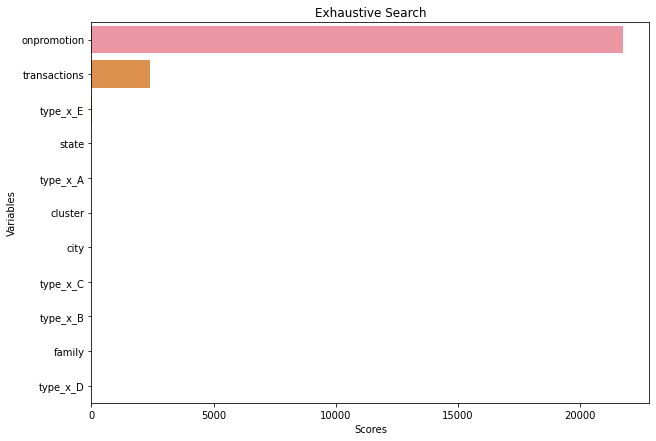

In [19]:
#Visualizing exhaustive search scores
plt.figure(figsize=(10,7))
sns.barplot(feat_scores['Scores'], feat_scores['Variables'], 
            order= feat_scores.sort_values('Scores', ascending=False).Variables)
plt.ylabel("Variables")
plt.xlabel("Scores")
#plt.xticks(rotation=70)
plt.title("Exhaustive Search")
plt.show()

In [20]:
X = X_f.drop(['type_x_B','type_x_D','family'],axis=1)
#X['family'] = le.inverse_transform(X['family'])
y = train['sales']

In [21]:
X_train = X
y_train = y

test = test.drop(['dcoilwtico','type_x_B','type_x_D','family'],axis=1)
X_test = test.drop(['sales'],axis=1)
y_test = test['sales']

#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(15272, 8) (15272,) (15272, 8) (15272,)


RMSE value is 13.991
R square value for validation is 0.989


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


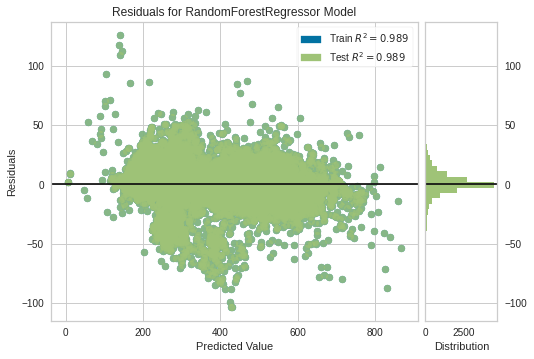

In [22]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
rf_reg = RandomForestRegressor()
model = rf_reg.fit(X_train,y_train)

y_pred = rf_reg.predict(X_test)

#MSE
print('RMSE value is %.3f'%np.sqrt(np.mean((y_pred-y_test)**2)))

#Rsquare value
print("R square value for validation is %.3f"%rf_reg.score(X_test,y_test))

visual = ResidualsPlot(model)
visual.fit(X_train, y_train)  # Fit the training data to the visualizer
visual.score(X_test, y_test)  # Evaluate the model on the test data
visual.show()

[04:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE value is 37.570
R square value for validation is 0.918


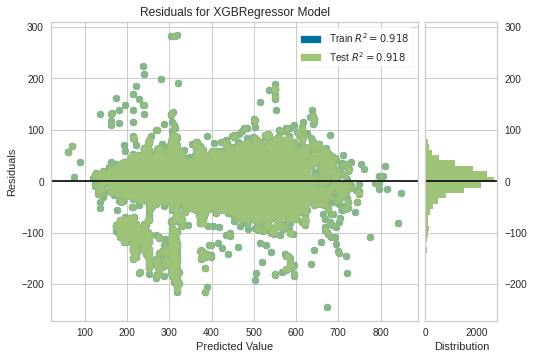

In [23]:
# Using Xgboost regressor
from xgboost import XGBRegressor, XGBRFRegressor
xgb_reg = XGBRegressor()
model2 = xgb_reg.fit(X_train,y_train)

y_pred2 = xgb_reg.predict(X_test)

#MSE
print('RMSE value is %.3f'%np.sqrt(np.mean((y_pred2-y_test)**2)))

#Rsquare value
print("R square value for validation is %.3f"%xgb_reg.score(X_test,y_test))

visual = ResidualsPlot(model2)
visual.fit(X_train, y_train)  # Fit the training data to the visualizer
visual.score(X_test, y_test)  # Evaluate the model on the test data
visual.show() 

In [31]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#giving different values for the parameters



#the rate at which the model learns
learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
#maximum number of levels in a tree
max_depth = [3,4,5,6,8,10,12,15]
# Minimum loss reduction required to make a further partition on a leaf node of the tree
gamma = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
#Minimum sum of instance weight(hessian) needed in a child.
min_child_weight = [1,3,5,7,9]
#Subsample ratio of columns when constructing each tree
colsample_bytree = [0.3,0.4,0.5,0.7,0.9]

parameters = {
    "learning_rate"    : learning_rate,
    "max_depth"        : max_depth,
    "gamma"            : gamma,
    "min_child_weight" : min_child_weight,
    "colsample_bytree" : colsample_bytree
}

In [25]:
#fitting with the XGB Regressor
XGB = XGBRegressor()

#Initialize randomised search CV
random_search = RandomizedSearchCV(XGB, param_distributions = parameters, n_iter = 5,
                                  scoring ='neg_root_mean_squared_error', n_jobs = -1, cv = 10, verbose = 3)
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[04:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, estimator=XGBRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7, 9]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [26]:
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.5, gamma=0.5, max_depth=6, min_child_weight=3)

In [27]:
XGB1 = XGBRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
             min_samples_split=2, n_estimators=400)

In [28]:
XGB1.fit(X_train,y_train)
y_pred8 = XGB1.predict(X_test)

#MSE
print('RMSE value is %.3f'%np.sqrt(np.mean((y_pred8-y_test)**2)))

#Rsquare value
print("R square value for validation is %.3f"%XGB1.score(X_test,y_test))

[04:04:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE value is 15.779
R square value for validation is 0.985


In [29]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred8)

0.03359327081108893

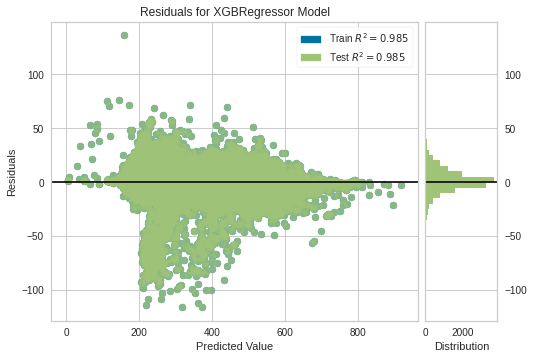

In [30]:
visual = ResidualsPlot(XGB1)
visual.fit(X_train, y_train)  # Fit the training data to the visualizer
visual.score(X_test, y_test)  # Evaluate the model on the test data
visual.show() 

In [148]:
y_pred9 = list(y_pred8)
pr1 = pd.DataFrame(y_pred9,columns=['Pred'])


y_test = y_test.reset_index()
y_test.head()
#y_test = y_test.drop(['date'],axis=1)

,date,sales
0,2013-06-20,176.337987
1,2015-04-04,366.943993
2,2016-05-12,402.015779
3,2014-06-21,244.239392
4,2016-05-30,523.924833


In [149]:
pr1.head()
pr = pd.concat([y_test,pr1],axis=1)
pr.head()
pr = pr.drop(['date'],axis=1)

In [150]:
xt = pd.DataFrame(X_test,columns=X.columns)
xt = xt.reset_index()
xt.head()

pr3 = pd.concat([xt,pr],axis=1)

In [151]:
pr3['year'] = pr3['date'].dt.year

In [153]:
pr3.head()

#pr3 = pr3.filter(cluster=5,family=27)
pr3 = pr3[(pr3['year']==2016)]


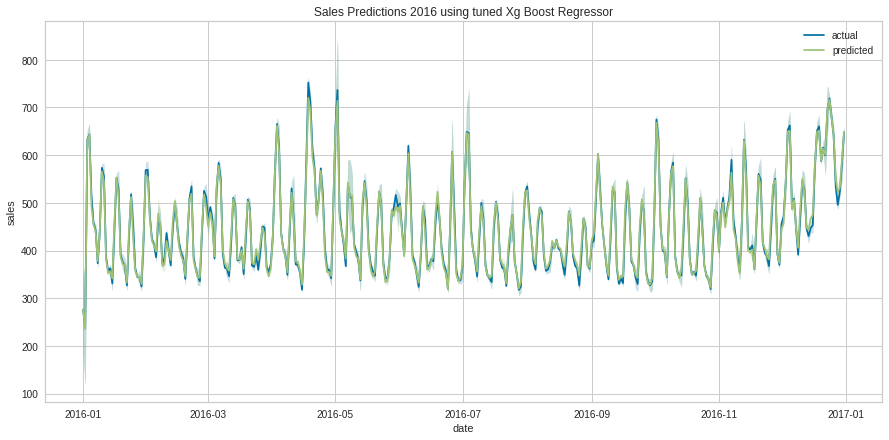

In [157]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.lineplot(x='date',y='sales',data=pr3,label='actual')
sns.lineplot(x='date',y='Pred',data=pr3,label='predicted')
plt.title("Sales Predictions 2016 using tuned Xg Boost Regressor")
plt.legend()
plt.show()